# Wegobuy Data Analysis

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [2]:
# display prep
def show(data):
    html = '<ul>'
    for line in data:
        html += '<li>' + line + '</li>'
    html += '</ul>'
    return HTML(html)

In [3]:
# data prep
data_file = 'data.csv'
df = pd.read_csv(data_file)
for col in ['goodsOrderTime', 'createTime', 'updateTime']:
    df[col] = pd.to_datetime(df[col], unit='s')

### Basic Info

In [4]:
data = []
data.append(f'Number of columns: {len(df.columns)}')
data.append(f'Number of items: {len(df)}')
data.append(f'Date range: {df["goodsOrderTime"].min()} to {df["goodsOrderTime"].max()}')
show(data)

### Notable Items

In [5]:
data = []
data.append(f"The most popular item was <a href='{df['goodsLink'].value_counts().idxmax()}'>{df['goodsLink'].value_counts().idxmax()}</a>, which was purchased {df['goodsLink'].value_counts().max()} times.")
data.append(f'The most expensive item was <a href="{df.loc[df["goodsPrice"].idxmax()]["goodsLink"]}">{df.loc[df["goodsPrice"].idxmax()]["goodsLink"]}</a>, which cost {df["goodsPrice"].max()} yuan')
show(data)

### Top 10 most popular items

In [38]:
print('item link                                           number of times purchased')
print(df['goodsLink'].value_counts()[:10])

item link                                           number of times purchased
https://item.taobao.com/item.htm?id=616770606113    486
https://item.taobao.com/item.htm?id=597070846405    417
https://item.taobao.com/item.htm?id=642094579440    407
https://item.taobao.com/item.htm?id=640860964105    351
https://item.taobao.com/item.htm?id=573745184333    336
https://item.taobao.com/item.htm?id=641825974885    332
https://item.taobao.com/item.htm?id=564151891731    267
https://item.taobao.com/item.htm?id=640069661790    258
https://item.taobao.com/item.htm?id=543020978173    252
https://item.taobao.com/item.htm?id=641448414763    202
Name: goodsLink, dtype: int64


### Top 10 items bought by most different users

In [43]:
unique_pop = df.drop_duplicates(subset=['buyerName', 'goodsLink'])
print('item link                                           number of times purchased')
print(unique_pop['goodsLink'].value_counts()[:10])

item link                                           number of times purchased
https://item.taobao.com/item.htm?id=616770606113    445
https://item.taobao.com/item.htm?id=642094579440    344
https://item.taobao.com/item.htm?id=573745184333    300
https://item.taobao.com/item.htm?id=640860964105    297
https://item.taobao.com/item.htm?id=597070846405    280
https://item.taobao.com/item.htm?id=641825974885    266
https://item.taobao.com/item.htm?id=640069661790    239
https://item.taobao.com/item.htm?id=543020978173    227
https://item.taobao.com/item.htm?id=564151891731    225
https://item.taobao.com/item.htm?id=571991582579    177
Name: goodsLink, dtype: int64


### Most popular countries

In [45]:
data=[]
data.append('10 most popular countries (in order): ' + str(df['countryCode'].value_counts()[:10].index.tolist()))
show(data)

### Notable Users

In [6]:
def get_biggest_spender():
    # yep
    users = {}
    for row in df.iterrows():
        if row[1]["buyerName"] not in users:
            users[row[1]["buyerName"]] = 0
        users[row[1]["buyerName"]] += row[1]["goodsPrice"]
    biggest = ('', 0)
    for u in users:
        if users[u] > biggest[1]:
            biggest = (u, users[u])
    return biggest
data = []
data.append(f'{df["buyerName"].mode()[0]} from {df[df["buyerName"] == df["buyerName"].mode()[0]]["countryCode"].iloc[0]} purchased the most items, {len(df[df["buyerName"] == df["buyerName"].mode()[0]])} items for a total of {df[df["buyerName"] == df["buyerName"].mode()[0]]["goodsPrice"].sum()} yuan')
biggest_spender = get_biggest_spender()
data.append(f'{biggest_spender[0]} from {df.loc[df["buyerName"] == biggest_spender[0]]["countryCode"].iloc[0]} spend the most money, {biggest_spender[1]} yuan on {len(df.loc[df["buyerName"] == biggest_spender[0]]["goodsPrice"])} items')
show(data)

### itzswace's items (price high to low)

In [30]:
with pd.option_context('expand_frame_repr', False, 'display.max_rows', None, 'display.max_columns', None):
    itzswace = df[['goodsOrderTime', 'buyerName', 'goodsLink', 'goodsPrice']].loc[df['buyerName'] == 'itzswace'][['goodsOrderTime', 'goodsLink', 'goodsPrice']].sort_values(by=['goodsPrice'], ascending=False)
    print(itzswace)

           goodsOrderTime                                         goodsLink  goodsPrice
35507 2021-04-11 18:38:15  https://item.taobao.com/item.htm?id=633403239068       730.0
35222 2021-04-11 17:07:59  https://item.taobao.com/item.htm?id=628723780061       499.0
35491 2021-04-11 18:38:15  https://item.taobao.com/item.htm?id=639720334341       428.0
35232 2021-04-11 17:07:59  https://item.taobao.com/item.htm?id=633402639801       399.0
35497 2021-04-11 18:38:15  https://item.taobao.com/item.htm?id=628294368249       399.0
35500 2021-04-11 18:38:15  https://item.taobao.com/item.htm?id=617973158622       399.0
35517 2021-04-11 18:38:15  https://item.taobao.com/item.htm?id=635190863043       378.0
35231 2021-04-11 17:07:59  https://item.taobao.com/item.htm?id=628944388374       368.0
35225 2021-04-11 17:07:59  https://item.taobao.com/item.htm?id=624465715073       359.0
35486 2021-04-11 18:38:15  https://item.taobao.com/item.htm?id=641647496661       329.0
35598 2021-04-11 19:03:09  https

### qmako41212's items (price high to low)

In [31]:
with pd.option_context('expand_frame_repr', False):
    qmako41212 = df[['goodsOrderTime', 'buyerName', 'goodsLink', 'goodsPrice']].loc[df['buyerName'] == 'qmako41212'][['goodsOrderTime', 'goodsLink', 'goodsPrice']].sort_values(by=['goodsPrice'], ascending=False)
    print(qmako41212)

           goodsOrderTime                                         goodsLink  goodsPrice
31779 2021-04-10 03:10:14  https://item.taobao.com/item.htm?id=625437721182    46000.00
51061 2021-04-17 00:18:50  https://item.taobao.com/item.htm?id=625437721182    39800.00
32601 2021-04-10 13:40:47  https://item.taobao.com/item.htm?id=625437721182     5800.00
52850 2021-04-17 19:01:25  https://item.taobao.com/item.htm?id=641276480591      469.00
17680 2021-04-04 02:50:11  https://item.taobao.com/item.htm?id=626998641867      399.00
17504 2021-04-04 01:28:52  https://item.taobao.com/item.htm?id=608891312479      398.00
53489 2021-04-18 01:47:44  https://item.taobao.com/item.htm?id=609365115649      289.00
17514 2021-04-04 01:38:33  https://item.taobao.com/item.htm?id=625619050749      279.00
8566  2021-03-31 23:20:17  https://item.taobao.com/item.htm?id=640457150236      248.00
17420 2021-04-04 00:29:58  https://item.taobao.com/item.htm?id=621609640387      238.00
53386 2021-04-18 00:41:55  https

### Pretty Pictures

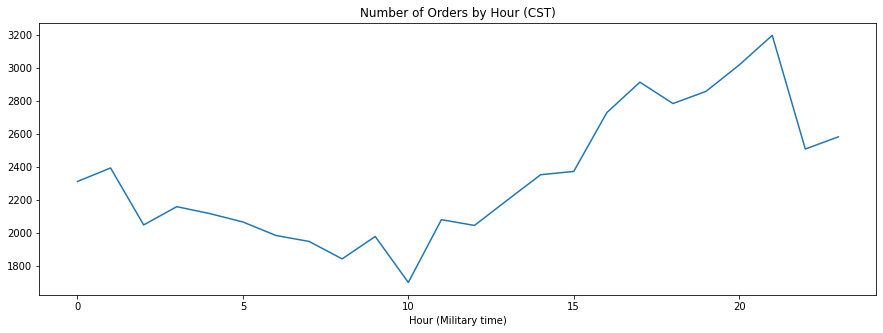

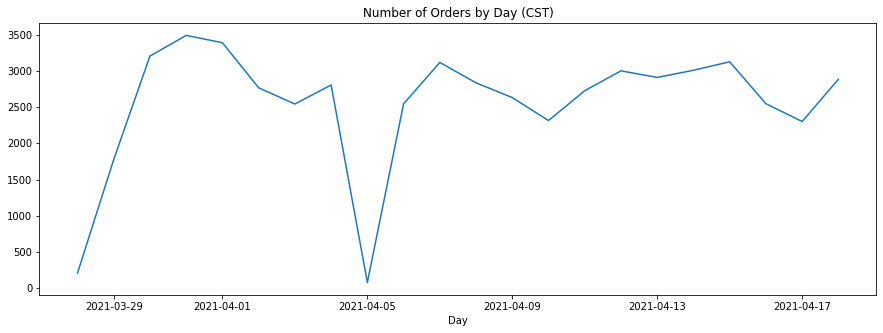

In [7]:
df.groupby(df['goodsOrderTime'].rename('Hour (Military time)').dt.hour).size().plot(title='Number of Orders by Hour (CST)', figsize=(15,5))
plt.show()
df.groupby(df['goodsOrderTime'].rename('Day').dt.date).size().plot(
    title='Number of Orders by Day (CST)', figsize=(15,5))
plt.show()